# **MINOR PROJECT**

---






# **TASK 1** - Exploratory Data Analysis

In [ ]:
#Iporting the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split


# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier


# Import our Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Video_games_esrb_rating.csv', encoding = 'latin1')
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ET


**Question 1. What is the distribution of ESRB ratings in the dataset? How many games fall into each rating category (E, ET, T, M)? Can you create a bar plot to visualize the distribution?**

In [ ]:
rating_counts = df['esrb_rating'].value_counts()
rating_counts

T     866
ET    516
E     504
M     476
Name: esrb_rating, dtype: int64

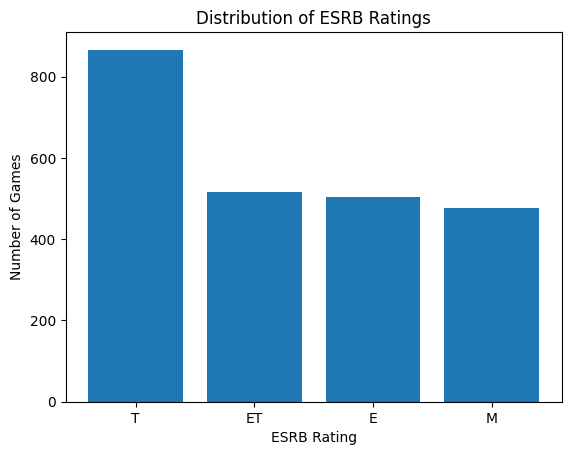

In [ ]:
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('ESRB Rating')
plt.ylabel('Number of Games')
plt.title('Distribution of ESRB Ratings')
plt.show()

Based on the analysis of the dataset, here is the distribution of ESRB ratings and the number of games falling into each rating category:



*   E (Everyone): 866
*   ET (Everyone 10+): 516
*   T (Teen): 504
*   M (Mature): 476

To visualize the distribution, a bar plot was created using the provided dataset. The bar plot represents the number of games in each ESRB rating category. The x-axis represents the rating categories (E, ET, T, M), and the y-axis represents the number of games.

**Question 2. Are there any specific ESRB content features that are more prevalent in certain rating categories? Can you analyze the frequency of each content feature for different ESRB ratings and determine if there are any significant differences?**

In [ ]:
df_modified = df.drop('esrb_rating', axis=1)

In [ ]:
# Subset the data based on ESRB ratings
subset_E = df_modified.loc[df['esrb_rating'] == 'E']
subset_ET = df_modified.loc[df['esrb_rating'] == 'ET']
subset_T = df_modified.loc[df['esrb_rating'] == 'T']
subset_M = df_modified.loc[df['esrb_rating'] == 'M']

In [ ]:
# Calculate the frequency of each content feature for different ESRB ratings
feature_freq_E = subset_E.iloc[:, 2:].apply(pd.to_numeric, errors='coerce').sum().sort_values(ascending=False)
feature_freq_ET = subset_ET.iloc[:, 2:].apply(pd.to_numeric, errors='coerce').sum().sort_values(ascending=False)
feature_freq_T = subset_T.iloc[:, 2:].apply(pd.to_numeric, errors='coerce').sum().sort_values(ascending=False)
feature_freq_M = subset_M.iloc[:, 2:].apply(pd.to_numeric, errors='coerce').sum().sort_values(ascending=False)

In [ ]:
feature_freq_E

num_descriptors             515
no_descriptors              310
mild_fantasy_violence        97
mild_lyrics                  27
mild_language                27
mild_cartoon_violence        23
mild_violence                 8
crude_humor                   3
violence                      1
use_of_drugs_and_alcohol      1
mild_blood                    1
animated_blood                0
sexual_themes                 0
simulated_gambling            0
partial_nudity                0
strong_sexual_content         0
suggestive_themes             0
use_of_alcohol                0
strong_language               0
sexual_content                0
mild_suggestive_themes        0
nudity                        0
blood                         0
mature_humor                  0
lyrics                        0
language                      0
intense_violence              0
fantasy_violence              0
drug_reference                0
cartoon_violence              0
blood_and_gore                0
esrb_enc

In [ ]:
feature_freq_ET

num_descriptors             904
esrb_encoded                516
fantasy_violence            339
mild_blood                   62
mild_lyrics                  56
intense_violence             45
mild_violence                42
mild_suggestive_themes       38
language                     35
crude_humor                  35
suggestive_themes            33
cartoon_violence             27
no_descriptors               16
mild_cartoon_violence        15
mild_language                15
mild_fantasy_violence        13
use_of_drugs_and_alcohol     12
drug_reference               12
use_of_alcohol               12
lyrics                       11
animated_blood               10
nudity                        5
simulated_gambling            4
strong_sexual_content         4
mature_humor                  4
violence                      4
strong_language               1
partial_nudity                1
sexual_content                0
sexual_themes                 0
blood                         0
blood_an

In [ ]:
feature_freq_T

num_descriptors             2084
esrb_encoded                1732
blood                        355
violence                     210
suggestive_themes            160
language                     152
fantasy_violence             151
mild_blood                    94
mild_lyrics                   93
intense_violence              88
crude_humor                   78
simulated_gambling            71
mild_suggestive_themes        64
blood_and_gore                64
mild_violence                 53
use_of_alcohol                49
no_descriptors                42
lyrics                        40
drug_reference                38
sexual_themes                 35
use_of_drugs_and_alcohol      35
sexual_content                32
mild_language                 26
cartoon_violence              21
partial_nudity                20
mature_humor                  15
nudity                        13
mild_cartoon_violence         12
animated_blood                10
strong_language                8
strong_sex

In [ ]:
feature_freq_M

num_descriptors             1491
esrb_encoded                1428
strong_language              241
blood_and_gore               240
blood                        195
intense_violence             123
strong_sexual_content         85
language                      80
sexual_themes                 79
suggestive_themes             68
simulated_gambling            63
violence                      59
fantasy_violence              50
sexual_content                43
partial_nudity                33
lyrics                        32
drug_reference                30
nudity                        20
use_of_alcohol                12
mild_blood                    11
use_of_drugs_and_alcohol       7
crude_humor                    7
no_descriptors                 4
mature_humor                   3
mild_fantasy_violence          2
mild_violence                  1
mild_cartoon_violence          1
mild_lyrics                    1
animated_blood                 0
mild_language                  0
cartoon_vi

In [ ]:
df[df["no_descriptors"] == 1].esrb_rating.value_counts()

E     315
T      43
ET     17
M       4
Name: esrb_rating, dtype: int64

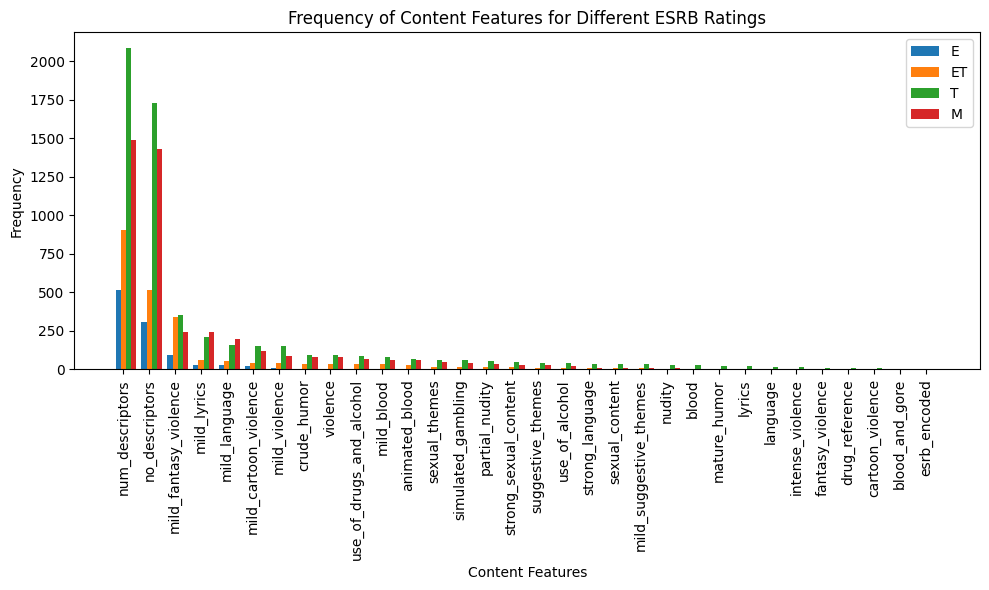

In [ ]:
# Plotting the frequencies for each content feature
labels = feature_freq_E.index
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

rects_E = ax.bar(x - width, feature_freq_E.tolist(), width, label='E')
rects_ET = ax.bar(x, feature_freq_ET.tolist(), width, label='ET')
rects_T = ax.bar(x + width, feature_freq_T.tolist(), width, label='T')
rects_M = ax.bar(x + 2 * width, feature_freq_M.tolist(), width, label='M')

ax.set_xlabel('Content Features')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Content Features for Different ESRB Ratings')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

**Question 3. Is there a correlation between the presence of certain content features (e.g., violence, sexual content) and the assigned ESRB rating? Can you analyze the correlation between these variables and determine if certain features are strong indicators of a specific rating category?**

<ipython-input-198-7ed3d125f9be>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="vlag", vmin=-1, vmax=1, annot= True)


<Axes: >

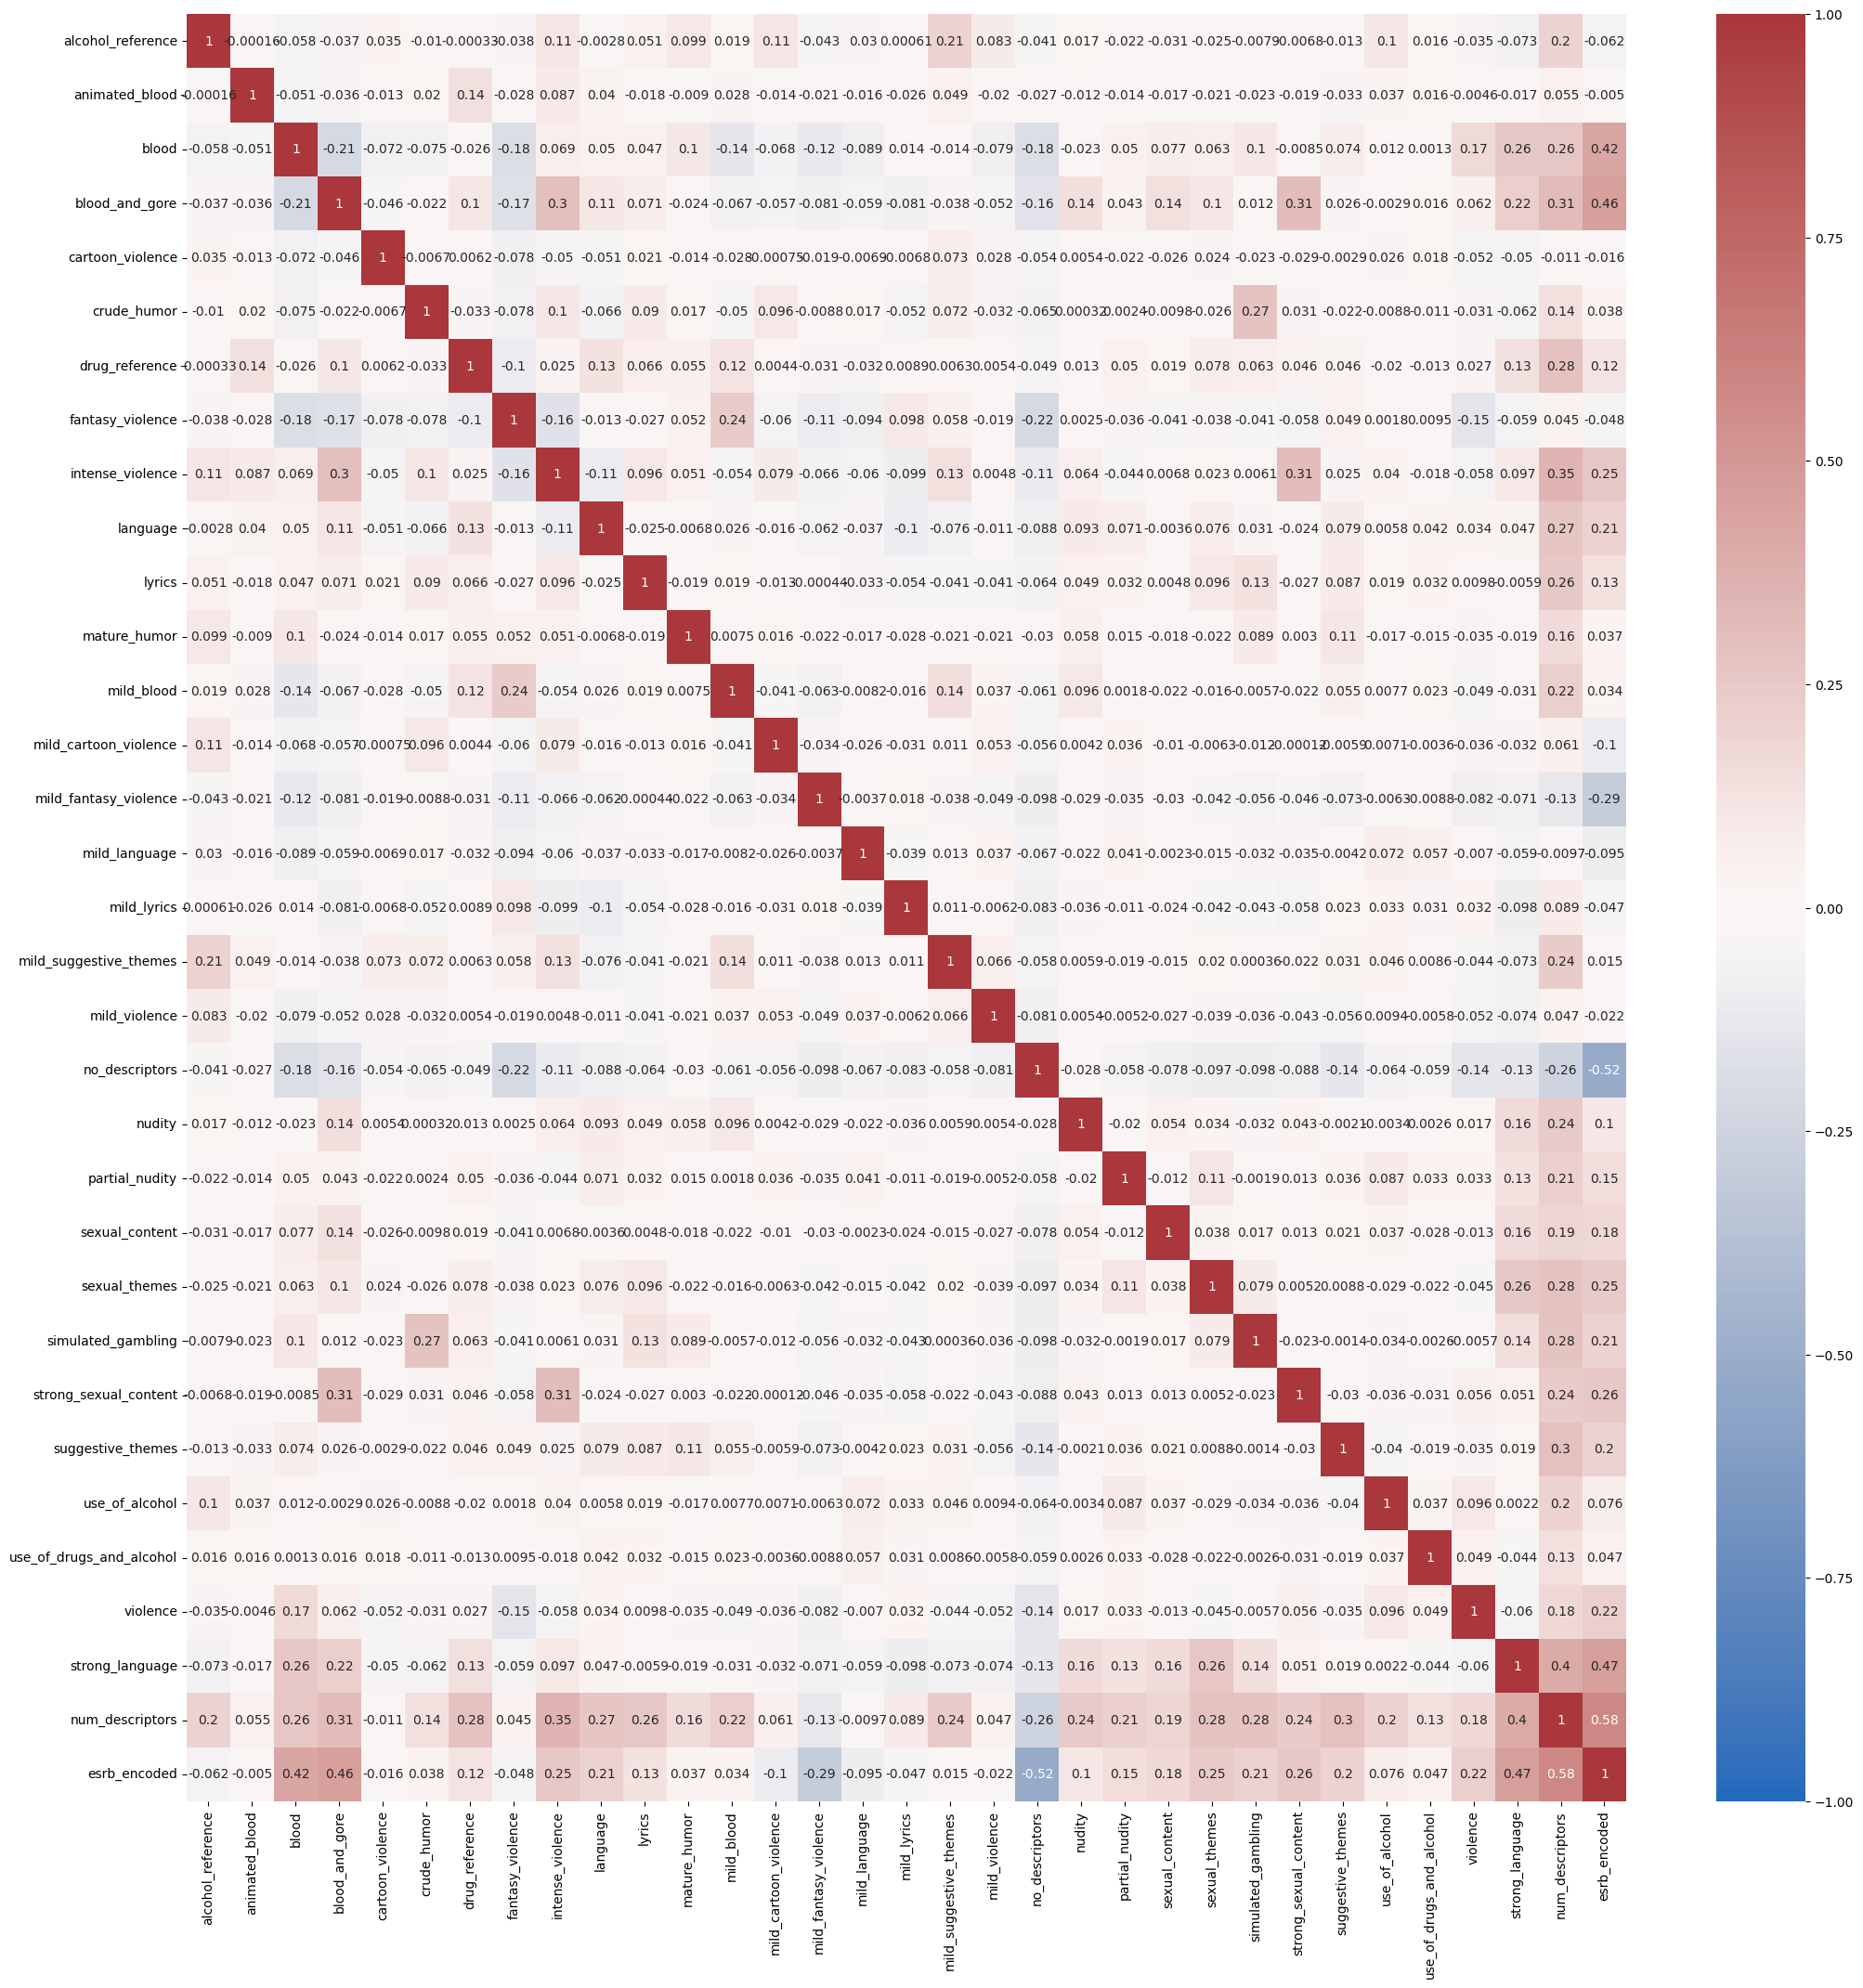

In [ ]:
plt.figure(figsize=(25, 25))

sns.heatmap(df.corr(), cmap="vlag", vmin=-1, vmax=1, annot= True)

We can see that blood, strong laguage and blood and gore are positively correlated with a higher esrb rating

Also the new feature I added is alo highly correlated with a higher rating

We can also see that mild fantasy violence is correlated with a lower esrb rating

**Question 4. Can you identify any patterns in the relationship between ESRB ratings and the presence of multiple content features? For example, are there certain combinations of features that are more common in specific rating categories?**

<ipython-input-208-de122ce57c4d>:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.iloc[:, 2:-1].corrwith(df['esrb_numeric'])


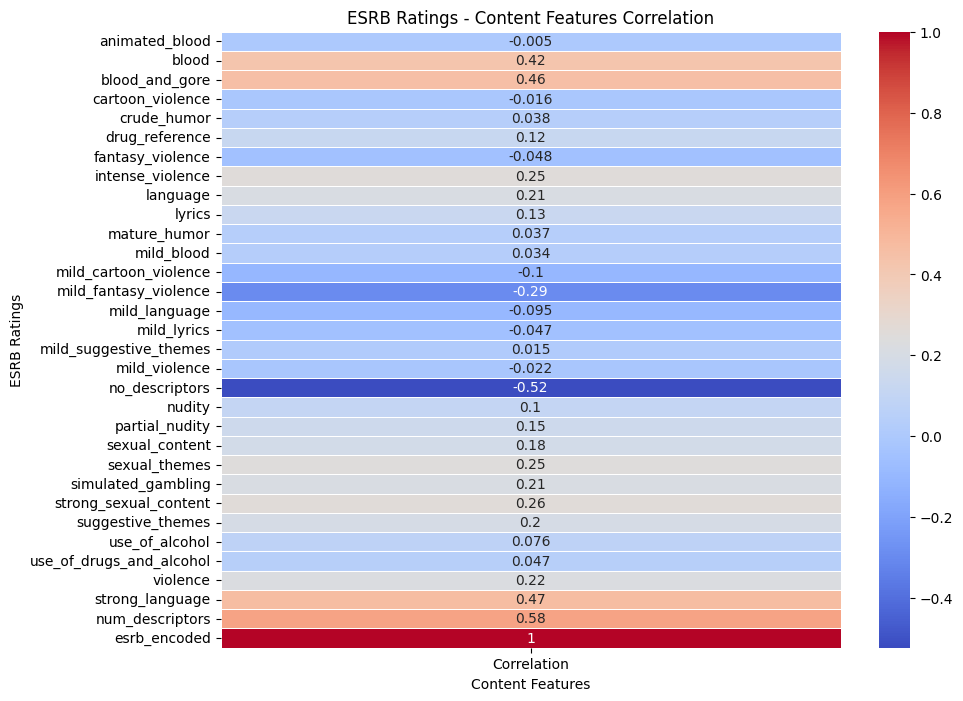

In [ ]:
# Convert ESRB ratings into numerical values
esrb_mapping = {'E': 1, 'ET': 2, 'T': 3, 'M': 4}
df['esrb_numeric'] = df['esrb_rating'].map(esrb_mapping)

# Calculate the correlation matrix
correlation_matrix = df.iloc[:, 2:-1].corrwith(df['esrb_numeric'])

# Reshape the correlation matrix to a 2D dataframe
correlation_df = pd.DataFrame(correlation_matrix, columns=['Correlation'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('ESRB Ratings - Content Features Correlation')
plt.xlabel('Content Features')
plt.ylabel('ESRB Ratings')
plt.show()

Based on the correlation matrix, we can observe the following patterns in the relationship between ESRB ratings and the presence of multiple content features:

1. Positive Correlations:
   - Features with positive correlations (values close to 1) with the ESRB ratings include blood_and_gore, strong_language, and num_descriptors. This suggests that these content features are more common in games with higher ESRB ratings (Mature - M or Teen - T).
   - Other features with moderate positive correlations include violence, strong_sexual_content, sexual_themes, simulated_gambling, and language. These features also tend to be more prevalent in games with higher ESRB ratings.

2. Negative Correlations:
   - The feature "no_descriptors" shows a strong negative correlation with the ESRB ratings. This implies that games with higher ESRB ratings (M or T) tend to have fewer instances of "no_descriptors."
   - Some other features with weak negative correlations include mild_fantasy_violence, mild_language, and mild_lyrics. These features are relatively less common in games with higher ESRB ratings.

These patterns indicate that certain combinations of features are more common in specific ESRB rating categories. For example, games with higher ESRB ratings tend to exhibit more explicit content features such as blood_and_gore, strong_language, and strong_sexual_content. On the other hand, games with lower ratings (E or ET) are more likely to have fewer content features overall, as indicated by the negative correlation with "no_descriptors."

It is important to note that correlation does not necessarily imply causation, and other factors may also contribute to the ESRB ratings. Further analysis and consideration of additional variables would be necessary to gain a more comprehensive understanding of the relationship between ESRB ratings and content features.

**Question 5. How well can the ESRB rating be predicted based on the presence of different content features? Can you build a classification model to predict the ESRB rating using the available features and evaluate its performance using appropriate metrics?**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Drop the last column (esrb_rating)
X = df.iloc[:, 2:-1]  # Content features
y = df['esrb_rating']  # ESRB ratings

# Convert ESRB ratings into numerical values
esrb_mapping = {'E': 1, 'ET': 2, 'T': 3, 'M': 4}
y = y.map(esrb_mapping)

# Perform one-hot encoding on the content features
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report)
print("\nConfusion Matrix:")
print(confusion_matrix)


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       112
           2       1.00      1.00      1.00       114
           3       1.00      1.00      1.00       154
           4       1.00      1.00      1.00        93

    accuracy                           1.00       473
   macro avg       1.00      1.00      1.00       473
weighted avg       1.00      1.00      1.00       473


Confusion Matrix:
[[112   0   0   0]
 [  0 114   0   0]
 [  0   0 154   0]
 [  0   0   0  93]]


The classification model based on logistic regression achieved a perfect accuracy of 1.00, indicating that it was able to correctly predict the ESRB ratings for all the instances in the testing set.

The classification report further supports the excellent performance of the model. The precision, recall, and F1-score for each class (ESRB rating) are all 1.00, indicating that the model achieved perfect precision, recall, and F1-score for all the classes. This means that the model correctly identified all instances of each ESRB rating without any false positives or false negatives.

The confusion matrix confirms the accuracy results, showing all the predicted values in the diagonal and zeros elsewhere. This means that there were no misclassifications in any of the ESRB ratings.

In conclusion, the logistic regression model demonstrated exceptional performance in predicting the ESRB ratings based on the presence of different content features. It was able to achieve perfect accuracy, precision, recall, and F1-score for all the ESRB ratings in the testing set.

# **TASK 2** - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices



In [ ]:
test_df = df[df["no_descriptors"] == 1]

In [ ]:
test_df[test_df["esrb_rating"] == "M"]

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
760,Maneater,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,M
1126,Observation,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,M
1182,Tharsis,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,M
1887,Frostpunk,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,M


Data is incorrectly labeled

Removing titles with no descriptors because there is no way to classify them.

Might also want to remove titles with less than a certain number of descriptors.

Should probably add a feature which is number of descriptors.

In [ ]:
df["no_descriptors"].value_counts()

0    2016
1     379
Name: no_descriptors, dtype: int64

Manually combined the 2 csv files on my own computer. Adds some more data.

The data is already broken up into 2 csvs

One for training and the other for testing

Kind of annoying but I could append one to the other and split them myself

In [ ]:
df.shape

(2395, 34)

In [ ]:
df.describe(include = "all")

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
count,2395,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,...,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.00000,2395.000000,2395.000000,2395
unique,2332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Still Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,873
mean,NaN,0.479332,0.050522,0.008351,0.231315,0.127349,0.020042,0.051357,0.034238,0.230063,...,0.031315,0.047599,0.057620,0.104384,0.038831,0.108977,0.03048,0.022965,0.114823,NaN
std,NaN,0.499677,0.219065,0.091019,0.421762,0.333433,0.140172,0.220771,0.181878,0.420961,...,0.174205,0.212961,0.233072,0.305822,0.193232,0.311675,0.17194,0.149822,0.318874,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     2395 non-null   object
 1   console                   2395 non-null   int64 
 2   alcohol_reference         2395 non-null   int64 
 3   animated_blood            2395 non-null   int64 
 4   blood                     2395 non-null   int64 
 5   blood_and_gore            2395 non-null   int64 
 6   cartoon_violence          2395 non-null   int64 
 7   crude_humor               2395 non-null   int64 
 8   drug_reference            2395 non-null   int64 
 9   fantasy_violence          2395 non-null   int64 
 10  intense_violence          2395 non-null   int64 
 11  language                  2395 non-null   int64 
 12  lyrics                    2395 non-null   int64 
 13  mature_humor              2395 non-null   int64 
 14  mild_blood              

In [ ]:
df.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

The column names follow proper conventions

strong_language is misspelled as

strong_janguage

Should probably rename the column

In [ ]:
df["strong_language"] = df["strong_janguage"]

In [ ]:
df.drop("strong_janguage", axis=1, inplace=True)

In [ ]:
#Console should not be useful so I am dropping it
df.drop("console", axis=1, inplace=True)

In [ ]:
column_names = list(df.columns)
column_names

['title',
 'alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'no_descriptors',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'esrb_rating',
 'strong_language']

In [ ]:
list_descriptors = list(df.columns)
list_descriptors.remove("title")
list_descriptors.remove("esrb_rating")

In [ ]:
df["num_descriptors"] = df[list_descriptors].sum(axis=1)
df.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_themes,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language,num_descriptors
0,Still Time,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,T,0,2
1,Surf World Series,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,1
2,The Metronomicon: Slay the Dance Floor,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,T,0,2
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,1
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,ET,0,3


In [ ]:
df['num_descriptors'].value_counts()

1    1003
2     589
3     417
4     241
5     108
0      19
6      18
Name: num_descriptors, dtype: int64

In [ ]:
# There seems to be a problem here
# We have 19 games that have 0 descriptors but all of those should have been removed
df[df['num_descriptors'] == 0]

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_themes,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language,num_descriptors
38,Gran Turismo Sport,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
70,Transport Giant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
95,Infinite Minigolf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
105,Conga Master,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
126,Transport Giant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
277,The Golf Club 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
325,Parappa the Rapper Remastered,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
371,Gem Smashers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
708,Race with Ryan Road Trip Deluxe Edition,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0
822,Cooking Mama: Cookstar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0


After looking into the data these ones have no descriptors but for some reason are improperly labeled in the no_descriptors column as having descriptors

Maybe this is because our data is inomplete and there are more descriptors used in the actual review of games

For now I shall remove these games

In [ ]:
df['num_descriptors'].value_counts()

1    1003
2     589
3     417
4     241
5     108
0      19
6      18
Name: num_descriptors, dtype: int64

In [ ]:
df.dtypes

title                       object
alcohol_reference            int64
animated_blood               int64
blood                        int64
blood_and_gore               int64
cartoon_violence             int64
crude_humor                  int64
drug_reference               int64
fantasy_violence             int64
intense_violence             int64
language                     int64
lyrics                       int64
mature_humor                 int64
mild_blood                   int64
mild_cartoon_violence        int64
mild_fantasy_violence        int64
mild_language                int64
mild_lyrics                  int64
mild_suggestive_themes       int64
mild_violence                int64
no_descriptors               int64
nudity                       int64
partial_nudity               int64
sexual_content               int64
sexual_themes                int64
simulated_gambling           int64
strong_sexual_content        int64
suggestive_themes            int64
use_of_alcohol      

In [ ]:
df.isnull().sum()

title                       0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_rating                 0
strong_language             0
num_descri

In [ ]:
df.esrb_rating.value_counts()

T     873
ET    529
E     516
M     477
Name: esrb_rating, dtype: int64

There seem to be less rating categories than those specifid in the data dictionary

Data is mostly balanced

In [ ]:
df.esrb_rating.unique()

array(['T', 'E', 'ET', 'M'], dtype=object)

In [ ]:
df.title.value_counts().value_counts()

1    2269
2      63
Name: title, dtype: int64

After adding the test data to the regular data we can see that there are some games with the same name

This may also be a case of special characters not being stored properly

In [ ]:
df.duplicated().sum()

33

We can also now see that there are 18 duplicated records

These should be removed

In [ ]:
for name in column_names:

  print(name)
  print(df[name].value_counts())
  print("***********************")

title
Still Time                             2
IRON CRYPTICLE                         2
Joe's Diner                            2
Nex Machina                            2
Island Flight Simulator                2
                                      ..
ROBOTICS;NOTES ELITE                   1
Biped                                  1
Under Night In-Birth Exe:Late[cl-r]    1
TT Isle of Man - Ride on the Edge 2    1
SPARC                                  1
Name: title, Length: 2332, dtype: int64
***********************
alcohol_reference
0    2274
1     121
Name: alcohol_reference, dtype: int64
***********************
animated_blood
0    2375
1      20
Name: animated_blood, dtype: int64
***********************
blood
0    1841
1     554
Name: blood, dtype: int64
***********************
blood_and_gore
0    2090
1     305
Name: blood_and_gore, dtype: int64
***********************
cartoon_violence
0    2347
1      48
Name: cartoon_violence, dtype: int64
***********************
crude_humor
0    

In [ ]:
print(df.shape, 'before dropping dupes')

# Another way to do the same thing
df = df.drop_duplicates()

print(df.shape, 'after dropping dupes')

(2395, 34) before dropping dupes
(2362, 34) after dropping dupes


In [ ]:
df.title.value_counts().value_counts()

1    2302
2      30
Name: title, dtype: int64

We can see removing the duplicates got rid of some of the games with the same name but not all

In [ ]:
df.duplicated().sum()

0

In [ ]:
for name in column_names:

  print(name)
  print(df[name].value_counts())
  print("***********************")

title
Still Time                               2
Narcosis                                 2
Night Trap - 25th Anniversary Edition    2
Hellblade: Senua's Sacrifice             2
The Long Dark                            2
                                        ..
The Sims 4 Vampires                     1
Cat Quest II                             1
Google Tilt Brush                        1
Immortal Realms: Vampire Wars            1
SPARC                                    1
Name: title, Length: 2332, dtype: int64
***********************
alcohol_reference
0    2243
1     119
Name: alcohol_reference, dtype: int64
***********************
animated_blood
0    2342
1      20
Name: animated_blood, dtype: int64
***********************
blood
0    1812
1     550
Name: blood, dtype: int64
***********************
blood_and_gore
0    2058
1     304
Name: blood_and_gore, dtype: int64
***********************
cartoon_violence
0    2314
1      48
Name: cartoon_violence, dtype: int64
*******************

In [ ]:
encode = {'E' : 0,
          'ET': 1,
          'T' : 2,
          'M' : 3}

In [ ]:
df["esrb_encoded"] = df["esrb_rating"].map(encode)

In [ ]:
df.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language,num_descriptors,esrb_encoded
0,Still Time,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,T,0,2,2
1,Surf World Series,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,0,1,0
2,The Metronomicon: Slay the Dance Floor,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,T,0,2,2
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,0,1,0
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,ET,0,3,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2362 entries, 0 to 2393
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     2362 non-null   object
 1   alcohol_reference         2362 non-null   int64 
 2   animated_blood            2362 non-null   int64 
 3   blood                     2362 non-null   int64 
 4   blood_and_gore            2362 non-null   int64 
 5   cartoon_violence          2362 non-null   int64 
 6   crude_humor               2362 non-null   int64 
 7   drug_reference            2362 non-null   int64 
 8   fantasy_violence          2362 non-null   int64 
 9   intense_violence          2362 non-null   int64 
 10  language                  2362 non-null   int64 
 11  lyrics                    2362 non-null   int64 
 12  mature_humor              2362 non-null   int64 
 13  mild_blood                2362 non-null   int64 
 14  mild_cartoon_violence   

In [ ]:
df["esrb_encoded"] = pd.to_numeric(df["esrb_encoded"])

Needed to change the encoded type to a number so we can get correlations

<ipython-input-135-7ed3d125f9be>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="vlag", vmin=-1, vmax=1, annot= True)


<Axes: >

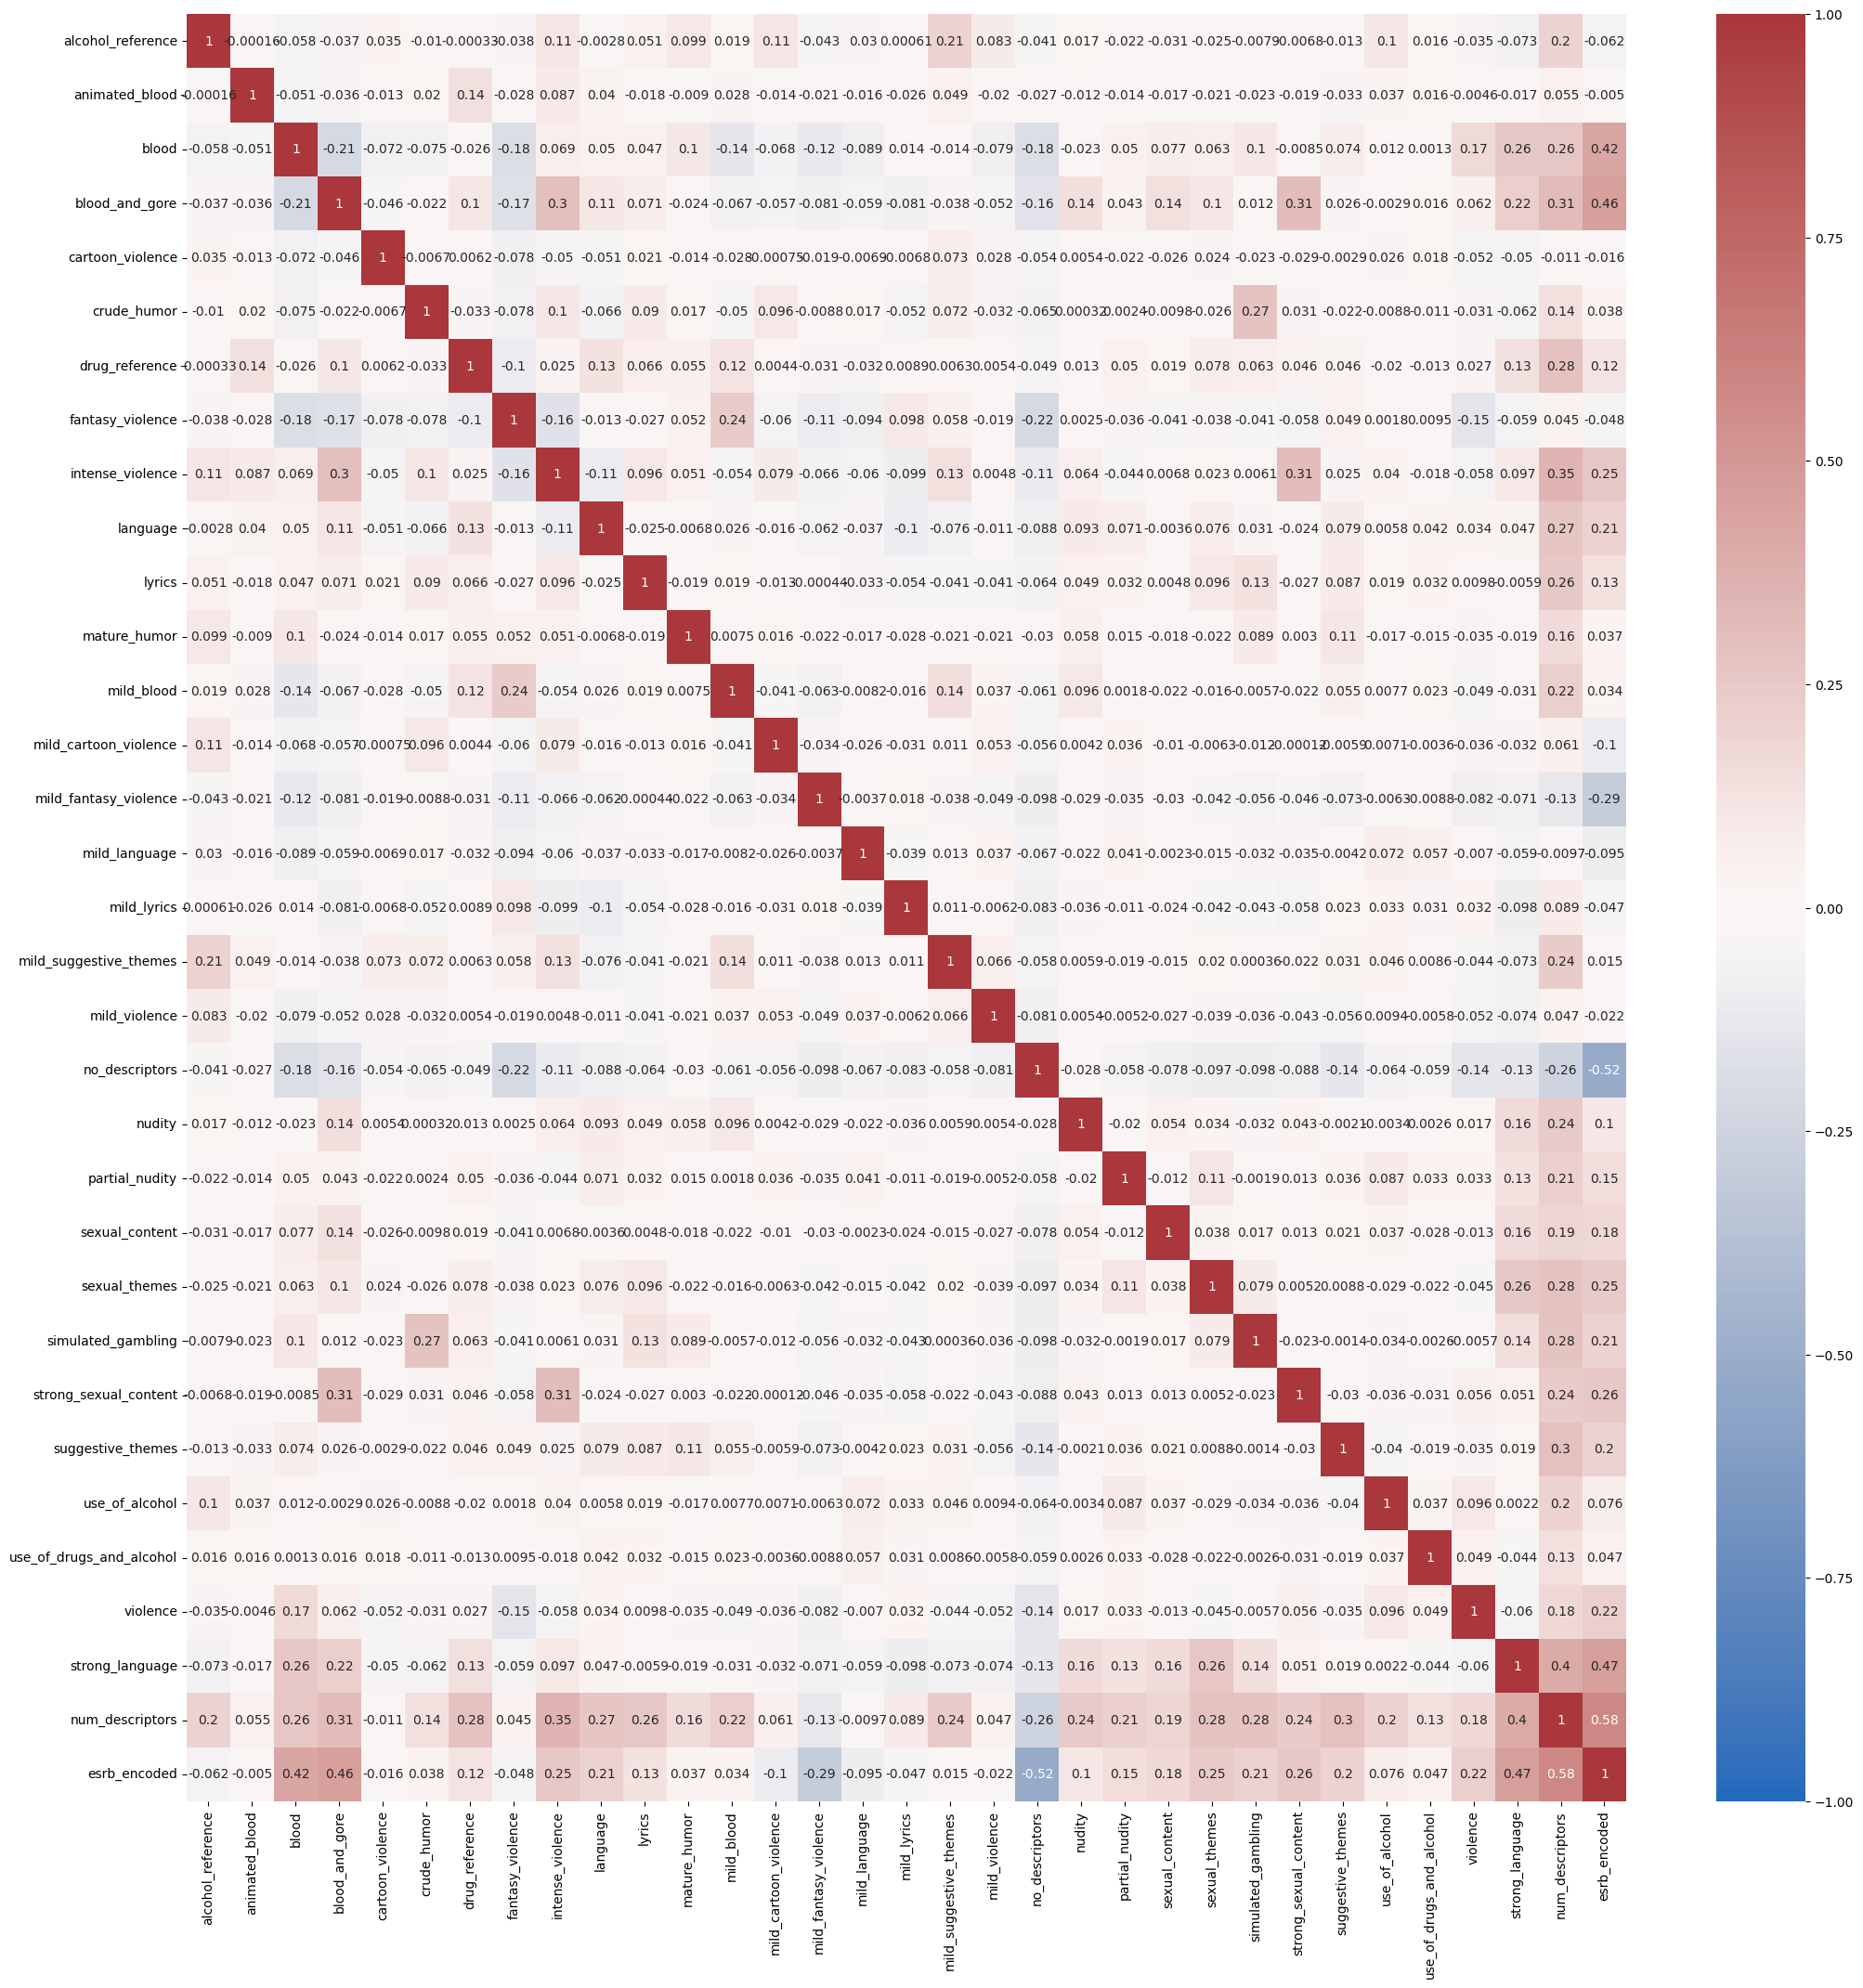

In [ ]:
plt.figure(figsize=(25, 25))

sns.heatmap(df.corr(), cmap="vlag", vmin=-1, vmax=1, annot= True)

We can see that blood, strong laguage and blood and gore are positively correlated with a higher esrb rating

Also the new feature I added is alo highly correlated with a higher rating

We can also see that mild fantasy violence is correlated with a lower esrb rating

Lots of visualisation can be done by making slices of the different ratings using groupby and seeing what categories are most common in the different ratings

Might want to remove no_descriptors from the column names

In [ ]:
selected_features = list(df.columns)
selected_features

['title',
 'alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'no_descriptors',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'esrb_rating',
 'strong_language',
 'num_descriptors',
 'esrb_encoded']

In [ ]:
selected_features.remove("title")
selected_features.remove("esrb_rating")
selected_features.remove("esrb_encoded")
selected_features.remove("no_descriptors")
selected_features

['alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'strong_language',
 'num_descriptors']

In [ ]:
X = df[selected_features]

y = df["esrb_rating"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [ ]:
print("Lenght of our Training data:", y_train.shape[0], "\nLength of our Testing data:", y_test.shape[0])

Lenght of our Training data: 1889 
Length of our Testing data: 473


First will try a normal decision tree and then a random forest

These seem like the best classifiers to use

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

Accuracy Score: 0.841438


Need different metrics for a multiclass classifier

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.93      0.96      0.94        93
          ET       0.71      0.84      0.77       100
           M       0.87      0.88      0.87        89
           T       0.87      0.77      0.82       191

    accuracy                           0.84       473
   macro avg       0.84      0.86      0.85       473
weighted avg       0.85      0.84      0.84       473



In [ ]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[ 89   3   0   1]
 [  5  84   0  11]
 [  0   1  78  10]
 [  2  30  12 147]]


Would be nice if it was labeled

Not exactly sure what the order of the class names should be

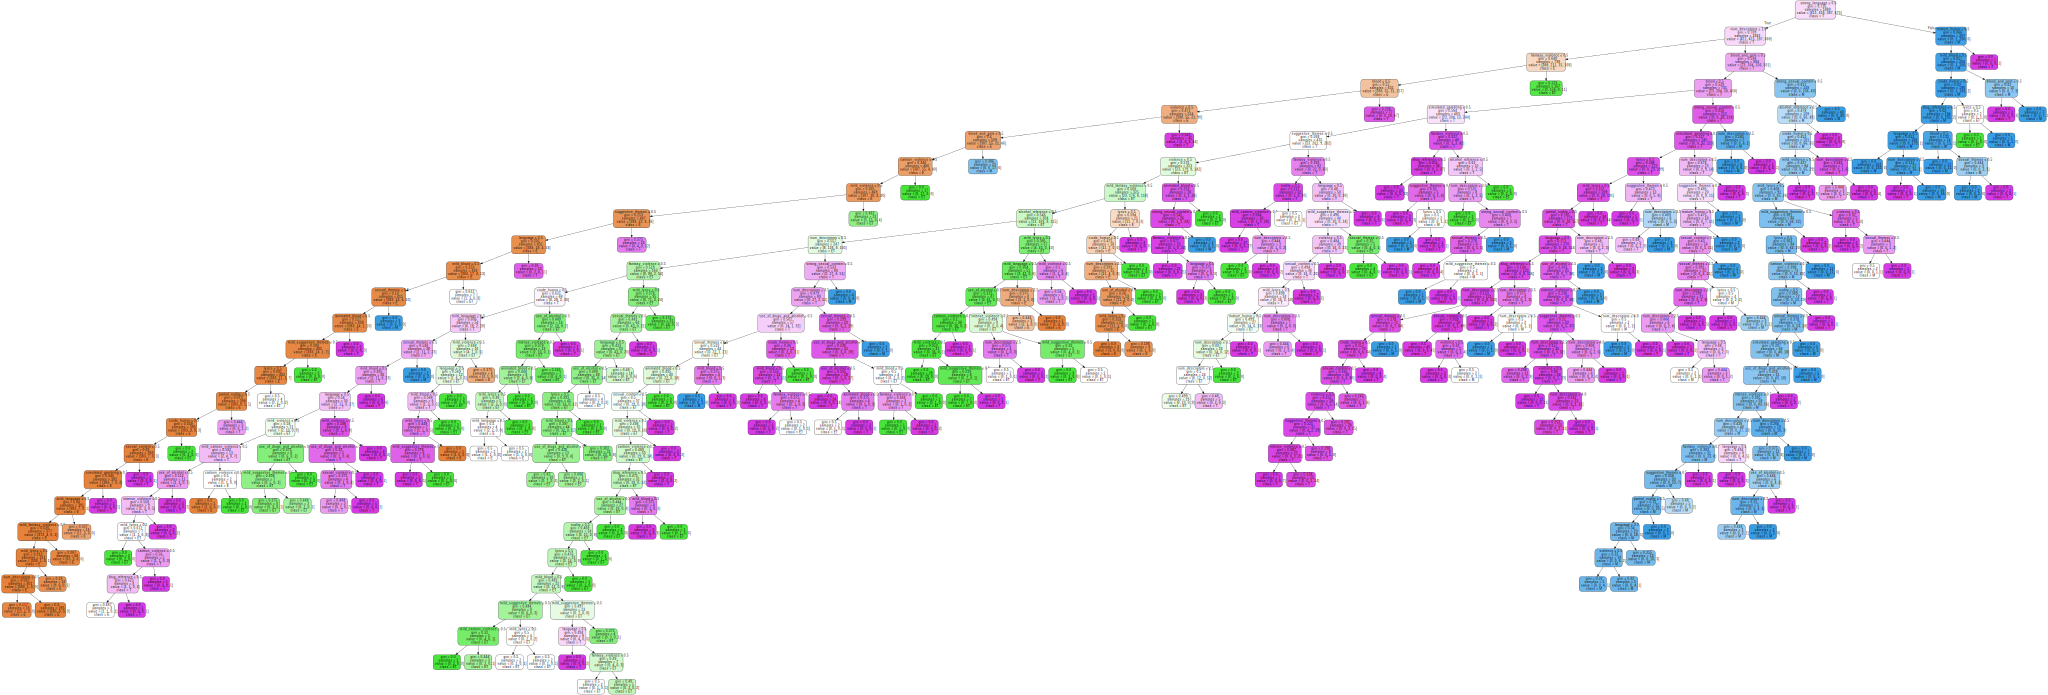

In [ ]:
import graphviz
from IPython.display import display

dot_data = tree.export_graphviz(model, out_file=None,
                     feature_names=selected_features,
                     class_names=["E", "ET", "M", "T"],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)

# Adjust the graph size
graph.format = 'png'
graph.render(filename='decision_tree', format='png', cleanup=True)
graph.format = 'svg'
graph.render(filename='decision_tree', format='svg', cleanup=True)

# Display the graph with scrollable output
display(graph)


In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features}).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
30,0.156754,num_descriptors
29,0.154384,strong_language
7,0.141501,fantasy_violence
2,0.102802,blood
3,0.089818,blood_and_gore
28,0.058669,violence
25,0.031357,suggestive_themes
4,0.026159,cartoon_violence
9,0.026098,language
18,0.023657,mild_violence


In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.94      0.96      0.95        93
          ET       0.75      0.82      0.78       100
           M       0.90      0.89      0.89        89
           T       0.86      0.81      0.84       191

    accuracy                           0.86       473
   macro avg       0.86      0.87      0.86       473
weighted avg       0.86      0.86      0.86       473



In [ ]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[ 89   3   0   1]
 [  4  82   0  14]
 [  0   0  79  10]
 [  2  25   9 155]]


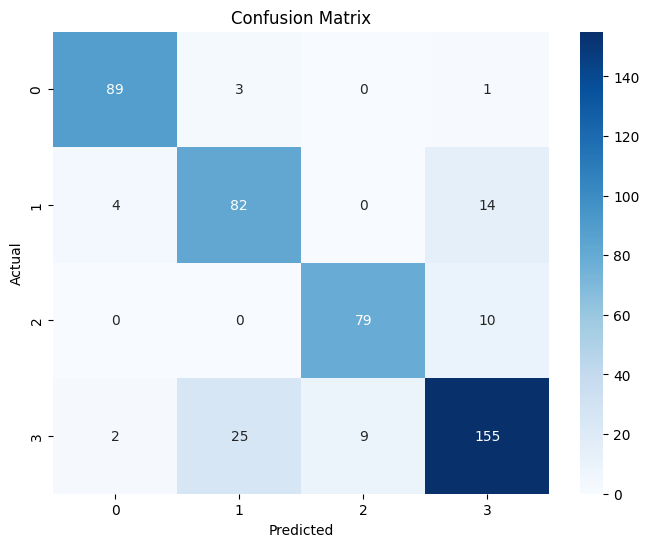

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features}).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
7,0.140952,fantasy_violence
30,0.137666,num_descriptors
29,0.119511,strong_language
2,0.102341,blood
3,0.080155,blood_and_gore
28,0.056343,violence
25,0.030684,suggestive_themes
24,0.028388,strong_sexual_content
9,0.026792,language
18,0.023083,mild_violence


In [ ]:
model = RandomForestClassifier()

In [ ]:
X = df[selected_features]

y = df["esrb_rating"]

Training the data on the whole dataset and passing in the test set just to check the accuracy

This should be fine as even though the model has seen all the data games with the exact same descriptors can get different ratings

In [ ]:
model.fit(X, y)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.97      0.96      0.96        93
          ET       0.85      0.89      0.87       100
           M       0.93      0.93      0.93        89
           T       0.91      0.90      0.90       191

    accuracy                           0.91       473
   macro avg       0.92      0.92      0.92       473
weighted avg       0.91      0.91      0.91       473



In [ ]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[ 89   3   0   1]
 [  2  89   0   9]
 [  0   0  83   6]
 [  1  13   6 171]]


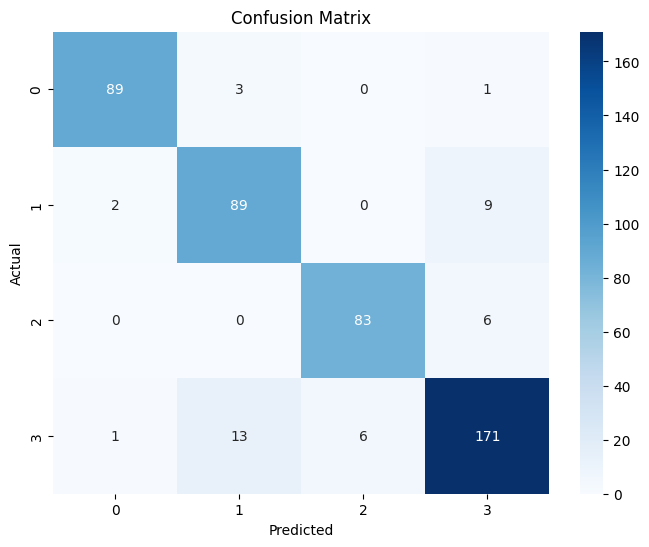

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
7,0.141562,fantasy_violence
30,0.136245,num_descriptors
29,0.115053,strong_language
2,0.098947,blood
3,0.086396,blood_and_gore
28,0.060034,violence
25,0.030255,suggestive_themes
9,0.027452,language
24,0.024788,strong_sexual_content
4,0.023493,cartoon_violence


In [ ]:
high_impact_descriptors = ["strong_language", "fantasy_violence", "blood_and_gore", "blood", "mild_fantasy_violence"]

In [ ]:
selected_features

In [ ]:
count = 0

new_game_values = []

for descriptor in selected_features:



  if (descriptor == "num_descriptors"):
    print()

  else:


    print("Does your game have", descriptor, "?")
    answer = input("Enter y for yes and anything else for no:     ")

    print("**********************************************************************")

    if(answer == "y"):
      new_game_values.append(1)

      count = count + 1

    else:
      new_game_values.append(0)





new_game_values.append(count)

Does your game have alcohol_reference ?
Enter y for yes and anything else for no:     y
**********************************************************************
Does your game have animated_blood ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have blood ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have blood_and_gore ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have cartoon_violence ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have crude_humor ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have drug_reference ?
Enter y for yes and anything else 

In [ ]:
new_game_values

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [ ]:
new_game_df = pd.DataFrame([new_game_values], columns=selected_features)
new_game_df

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,sexual_content,sexual_themes,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,strong_language,num_descriptors
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y_pred = model.predict(new_game_df)

In [ ]:
y_pred

array(['E'], dtype=object)

In [ ]:
y_pred_proba = model.predict_proba(new_game_df)

In [ ]:
y_pred_proba

array([[0.91336582, 0.        , 0.        , 0.08663418]])

In [ ]:
df.esrb_rating.value_counts(normalize=True)

T     0.366638
ET    0.218459
E     0.213378
M     0.201524
Name: esrb_rating, dtype: float64

E, ET, M T

There seems to be a bias towars rating games T

Probably because of the unbalanced nature of the dataset

              precision    recall  f1-score   support

           E       0.97      0.98      0.97       504
          ET       0.87      0.90      0.88       516
           M       0.94      0.93      0.94       476
           T       0.91      0.89      0.90       866

    accuracy                           0.92      2362
   macro avg       0.92      0.92      0.92      2362
weighted avg       0.92      0.92      0.92      2362



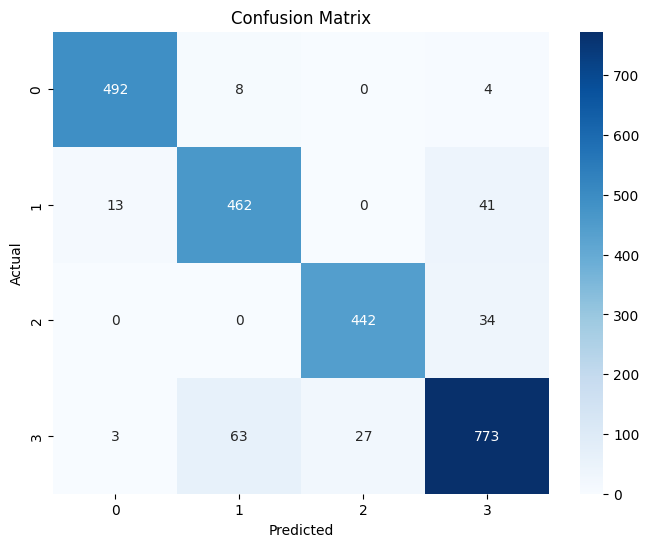

In [ ]:
from sklearn import metrics

y_pred = model.predict(X)

print(metrics.classification_report(y, y_pred))

cm = metrics.confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(X_train, y_train)


# Make new predictions of our testing data.
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

           E       0.87      0.43      0.58        93
          ET       0.71      0.84      0.77       100
           M       0.84      0.84      0.84        89
           T       0.65      0.75      0.70       191

    accuracy                           0.72       473
   macro avg       0.77      0.72      0.72       473
weighted avg       0.74      0.72      0.72       473



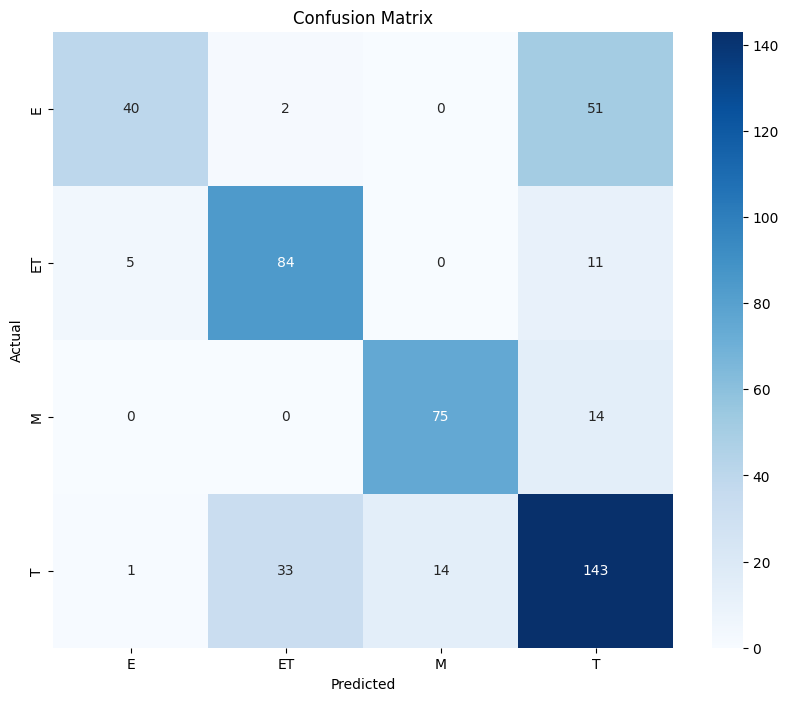

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Obtain predictions from the model
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(X, y)


# Make new predictions of our testing data.
y_pred = model.predict(X)

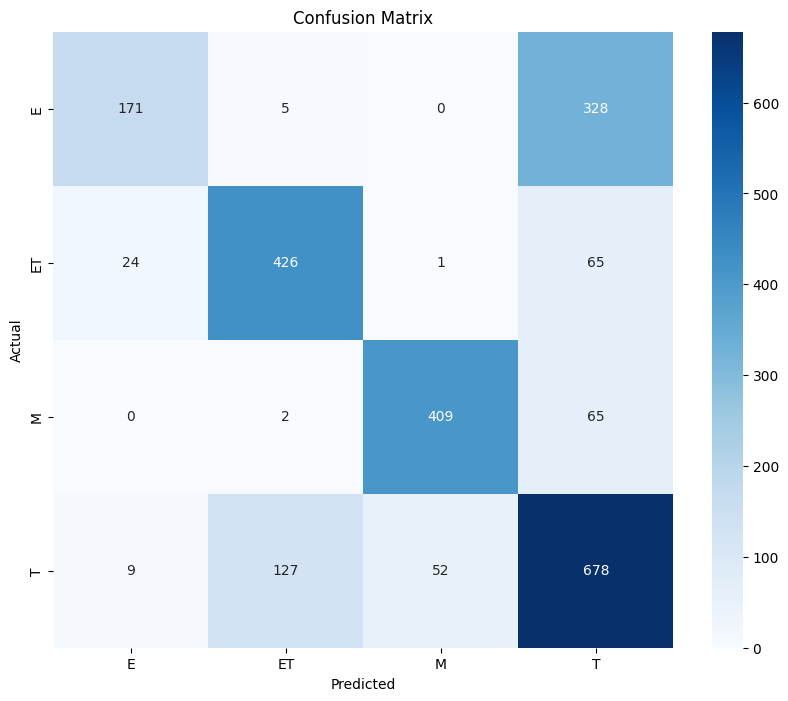

              precision    recall  f1-score   support

           E       0.84      0.34      0.48       504
          ET       0.76      0.83      0.79       516
           M       0.89      0.86      0.87       476
           T       0.60      0.78      0.68       866

    accuracy                           0.71      2362
   macro avg       0.77      0.70      0.71      2362
weighted avg       0.74      0.71      0.70      2362



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(ticks=np.arange(len(model.classes_))+0.5, labels=model.classes_)
plt.yticks(ticks=np.arange(len(model.classes_))+0.5, labels=model.classes_)
plt.show()

# Print classification report
print(classification_report(y, y_pred))


Random Forest is still the best

In [ ]:
test_df_2 = df[df["num_descriptors"] == 0]

In [ ]:
test_df_2[df["esrb_rating"] == "ET"]

<ipython-input-184-3dcef3e07264>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df_2[df["esrb_rating"] == "ET"]


,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language,num_descriptors,esrb_encoded
1400,Project Highrise - Architect's Edition,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,ET,0,0,1
